In [2]:
# install and upgrade torchvision for jupyter notebook
!pip install --upgrade jupyter torchvision matplotlib



  Using cached torchvision-0.20.0-cp39-cp39-win_amd64.whl (1.6 MB)
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.19.1
    Uninstalling torchvision-0.19.1:
      Successfully uninstalled torchvision-0.19.1


  Attempting uninstall: sympy
    Found existing installation: sympy 1.10.1
    Uninstalling sympy-1.10.1:
      Successfully uninstalled sympy-1.10.1
  Attempting uninstall: torch
    Found existing installation: torch 2.4.1
    Uninstalling torch-2.4.1:
      Successfully uninstalled torch-2.4.1
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.19.1
    Can't uninstall 'torchvision'. No files were found to uninstall.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.0.2 requires torch==2.0.1, but you have torch 2.5.0 which is incompatible.


In [4]:
# import packages
import torch
import matplotlib.pyplot as plt
from torch import nn
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from torchvision import datasets
from torchvision.transforms import ToTensor
import torchvision.transforms
from torchvision.transforms import ToPILImage
import numpy as np
import math
import random
import torch.optim as optim
from PIL import Image
from torchvision.transforms import RandomHorizontalFlip
from torchvision.transforms import Compose
import torch.nn.functional as functional
import torchvision.transforms.functional as F


In [5]:
# MINST Dataset
image_path = './'
transform = transforms.Compose([transforms.ToTensor()])

mnist_train = torchvision.datasets.MNIST(root=image_path, train= True,
                                         transform=transform, download=True)

mnist_test = torchvision.datasets.MNIST(root=image_path, train= False,
                                         transform=transform, download=True)

batch_size = 32
torch.manual_seed(1)
train_dl = DataLoader(mnist_train, batch_size, shuffle=True)
test_dl = DataLoader(mnist_test, batch_size, shuffle=True)

train_data = mnist_train.data   
train_labels = mnist_train.targets


mnist_data_tensor = torch.tensor(train_data, dtype=torch.float32) / 255.0
train_labels_tensor = torch.tensor(train_labels, dtype=torch.long)

C:\Users\delal\AppData\Local\Temp\ipykernel_36968\3216606677.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mnist_data_tensor = torch.tensor(train_data, dtype=torch.float32) / 255.0
C:\Users\delal\AppData\Local\Temp\ipykernel_36968\3216606677.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(train_labels, dtype=torch.long)


In [6]:
# Dimension of the dataset
print(f'{mnist_train.data[0].shape} pixels')

torch.Size([28, 28]) pixels


In [7]:
# MLP Model for MINST dataset

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.hidden = nn.Linear(28*28, 128)  
        self.output = nn.Linear(128, 10)    
        self.relu = nn.ReLU()                

    def forward(self, x):
        x = x.view(-1, 28*28)  
        x = self.relu(self.hidden(x))  
        x = self.output(x)              
        return x


model = MLP()


In [8]:
# Loss function and Optimizer 

criterion = nn.CrossEntropyLoss()   
optimizer = optim.SGD(model.parameters(), lr=0.01)  


# Check if GPU resource is allowed to use
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"operating with {device} hardware")

operating with cpu hardware


In [8]:
# Train Model for MNIST 

num_epochs = 5
accuracies = [] 

for epoch in range(num_epochs):
    running_loss = 0.0
    correct_predictions = 0
    total_predictions = 0
    
    for images, labels in train_dl:
        optimizer.zero_grad()
        
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct_predictions += (predicted == labels).sum().item()
        total_predictions += labels.size(0)
        
    avg_loss = running_loss / len(train_dl)
    accuracy = (correct_predictions / total_predictions) * 100  
    accuracies.append(accuracy)
    
    print(f'-- Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}, Accuracy: {accuracy:.2f}%')


-- Epoch [1/5], Loss: 0.5802, Accuracy: 86.46%
-- Epoch [2/5], Loss: 0.3591, Accuracy: 89.95%
-- Epoch [3/5], Loss: 0.3130, Accuracy: 91.16%
-- Epoch [4/5], Loss: 0.2838, Accuracy: 91.92%
-- Epoch [5/5], Loss: 0.2613, Accuracy: 92.66%


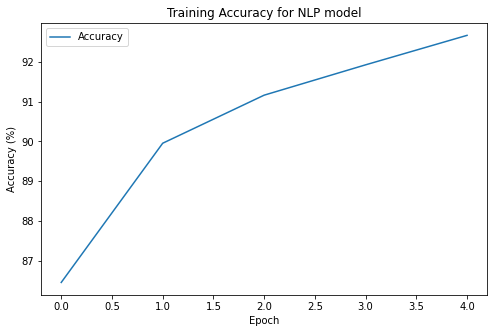

In [9]:
plt.figure(figsize=(8, 5))
plt.plot(accuracies, label='Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training Accuracy for NLP model')
plt.legend()
plt.show()

# Cifar-10 

In [9]:
# CIFAR-10 Dataset

train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, transform=transform, download=True)

# DataLoaders for training and testing
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


Files already downloaded and verified
Files already downloaded and verified


In [10]:
# Transforms for CIFAR-10
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
])


In [11]:
# Dimension of the dataset
print(f'{train_dataset.data[0].shape} pixels')


(32, 32, 3) pixels


In [12]:

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)  
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(128 * 4 * 4, 256) 
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)  

    def forward(self, x):
        x = self.pool(functional.relu(self.conv1(x)))
        x = self.pool(functional.relu(self.conv2(x)))
        x = self.pool(functional.relu(self.conv3(x)))
        x = x.view(-1, 128 * 4 * 4)
        x = functional.relu(self.fc1(x))
        x = functional.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    

model2 = CNN()


In [61]:
# Train Model for CIFAR-10 

num_epochs = 10
accuracies = [] 

for epoch in range(num_epochs):
    running_loss = 0.0
    correct_predictions = 0
    total_predictions = 0
    
    for images, labels in train_loader:
        optimizer.zero_grad()
        
        outputs = model2(images)
        loss = criterion(outputs, labels)
        
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct_predictions += (predicted == labels).sum().item()
        total_predictions += labels.size(0)
        
    avg_loss = running_loss / len(train_loader)
    accuracy = (correct_predictions / total_predictions) * 100  
    accuracies.append(accuracy)
    
    print(f'-- Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}, Accuracy: {accuracy:.2f}%')


-- Epoch [1/10], Loss: 2.3039, Accuracy: 10.00%
-- Epoch [2/10], Loss: 2.3039, Accuracy: 10.00%
-- Epoch [3/10], Loss: 2.3039, Accuracy: 10.00%
-- Epoch [4/10], Loss: 2.3039, Accuracy: 10.00%
-- Epoch [5/10], Loss: 2.3039, Accuracy: 10.00%
-- Epoch [6/10], Loss: 2.3039, Accuracy: 10.00%
-- Epoch [7/10], Loss: 2.3040, Accuracy: 10.00%
-- Epoch [8/10], Loss: 2.3039, Accuracy: 10.00%
-- Epoch [9/10], Loss: 2.3039, Accuracy: 10.00%
-- Epoch [10/10], Loss: 2.3039, Accuracy: 10.00%


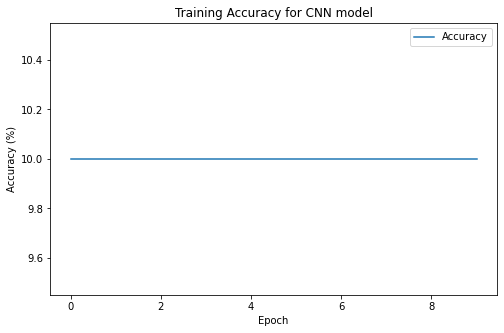

In [67]:
# plot the result on a graph 

plt.figure(figsize=(8, 5))
plt.plot(accuracies, label='Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training Accuracy for CNN model')
plt.legend()
plt.show()

# MNIST 

Three different data augmentation techniques: 


In [13]:
# Display an image
def show_minst_image(tensor_img, title="Image"):
    img = tensor_img.squeeze().numpy()
    plt.imshow(img, cmap='gray') # Grayscale
    plt.title(title)
    plt.axis('off')
    plt.show()

In [14]:
# MNIST dataset
mnist_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())

# Random image from the dataset
random_index = torch.randint(len(mnist_dataset), size=(1,)).item()
image, label = mnist_dataset[random_index] 


In [15]:
# Define the rotation transformation
rotate = transforms.RandomRotation(degrees=(60, 90))


rotated_image = rotate(image)


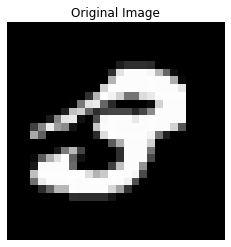

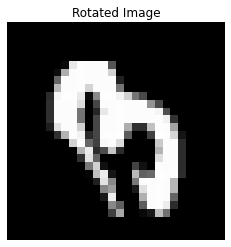

In [16]:
# Original and rotated images
show_minst_image(image, title="Original Image")
show_minst_image(rotated_image, title="Rotated Image")


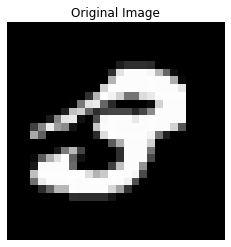

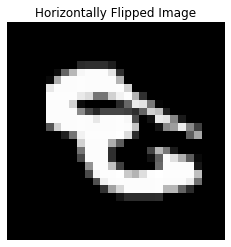

In [17]:
# flip the image horizontally

horizontal_flip = transforms.RandomHorizontalFlip(p=1.0)  

# Apply the horizontal flip 
flipped_image = horizontal_flip(image)

# Original and horizontally flipped
show_minst_image(image, title="Original Image")
show_minst_image(flipped_image, title="Horizontally Flipped Image")


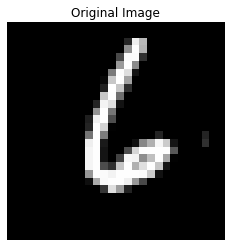

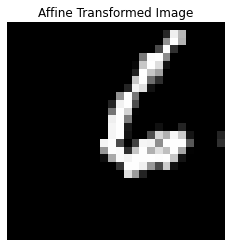

In [46]:
# affine transformation
affine_transform = transforms.RandomAffine(
    degrees=30,               
    translate=(0.1, 0.1),     
    scale=(0.9, 1.1),         
    shear=10                  
)


transformed_image = affine_transform(image)

# Original and affine transformed 
show_minst_image(image, title="Original Image")
show_minst_image(transformed_image, title="Affine Transformed Image")


Three different learning rate schedulers

In [41]:
# Define and Apply Learning Rate Schedulers

# StepLR
scheduler_step = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)


In [42]:
# ExponentialLR
scheduler_exp = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)


In [43]:
# ReduceLROnPlateau
scheduler_plateau = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=2)


In [44]:
# Train the Model with given Schedulers

# With StepLR
num_epochs = 15
scheduler = scheduler_step
accuracies = [] 

for epoch in range(num_epochs):
    running_loss = 0.0
    correct_predictions = 0
    total_predictions = 0
    
    for images, labels in train_dl:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct_predictions += (predicted == labels).sum().item()
        total_predictions += labels.size(0)
    
    avg_loss = running_loss / len(train_dl)
    accuracy = (correct_predictions / total_predictions) * 100
    accuracies.append(accuracy)
    

    if isinstance(scheduler, optim.lr_scheduler.ReduceLROnPlateau):
        scheduler.step(avg_loss)
    else:
        scheduler.step()
    
    print(f'-- Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}, LR: {scheduler.get_last_lr()[0]:.6f}, Accuracy: {accuracy:.2f}%')

-- Epoch [1/15], Loss: 0.8648, LR: 0.010000, Accuracy: 80.76%
-- Epoch [2/15], Loss: 0.3736, LR: 0.010000, Accuracy: 89.63%
-- Epoch [3/15], Loss: 0.3206, LR: 0.010000, Accuracy: 90.91%
-- Epoch [4/15], Loss: 0.2909, LR: 0.010000, Accuracy: 91.77%
-- Epoch [5/15], Loss: 0.2692, LR: 0.001000, Accuracy: 92.32%
-- Epoch [6/15], Loss: 0.2552, LR: 0.001000, Accuracy: 92.78%
-- Epoch [7/15], Loss: 0.2531, LR: 0.001000, Accuracy: 92.85%
-- Epoch [8/15], Loss: 0.2513, LR: 0.001000, Accuracy: 92.88%
-- Epoch [9/15], Loss: 0.2496, LR: 0.001000, Accuracy: 92.94%
-- Epoch [10/15], Loss: 0.2479, LR: 0.000100, Accuracy: 92.98%
-- Epoch [11/15], Loss: 0.2467, LR: 0.000100, Accuracy: 93.04%
-- Epoch [12/15], Loss: 0.2465, LR: 0.000100, Accuracy: 93.05%
-- Epoch [13/15], Loss: 0.2463, LR: 0.000100, Accuracy: 93.06%
-- Epoch [14/15], Loss: 0.2461, LR: 0.000100, Accuracy: 93.05%
-- Epoch [15/15], Loss: 0.2459, LR: 0.000010, Accuracy: 93.08%


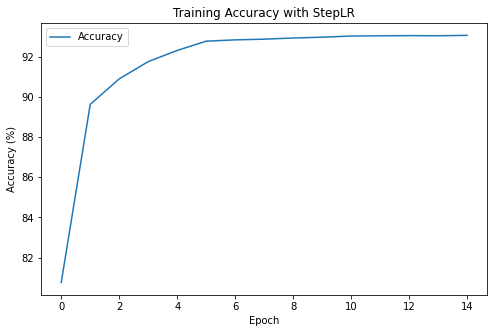

In [45]:
# Plot Accuracy over Epochs
plt.figure(figsize=(8, 5))
plt.plot(accuracies, label='Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training Accuracy with StepLR')
plt.legend()
plt.show()

In [46]:
# With ExponentialLR

num_epochs = 15
scheduler = scheduler_exp
accuracies = [] 

for epoch in range(num_epochs):
    running_loss = 0.0
    correct_predictions = 0
    total_predictions = 0
    
    for images, labels in train_dl:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct_predictions += (predicted == labels).sum().item()
        total_predictions += labels.size(0)
    
    avg_loss = running_loss / len(train_dl)
    accuracy = (correct_predictions / total_predictions) * 100
    accuracies.append(accuracy)  
   
    if isinstance(scheduler, optim.lr_scheduler.ReduceLROnPlateau):
        scheduler.step(avg_loss)  
    else:
        scheduler.step()
    
    print(f'-- Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}, LR: {scheduler.get_last_lr()[0]:.6f}, Accuracy: {accuracy:.2f}%')

-- Epoch [1/15], Loss: 0.2458, LR: 0.000009, Accuracy: 93.08%
-- Epoch [2/15], Loss: 0.2458, LR: 0.000008, Accuracy: 93.08%
-- Epoch [3/15], Loss: 0.2458, LR: 0.000007, Accuracy: 93.08%
-- Epoch [4/15], Loss: 0.2458, LR: 0.000007, Accuracy: 93.08%
-- Epoch [5/15], Loss: 0.2457, LR: 0.000006, Accuracy: 93.08%
-- Epoch [6/15], Loss: 0.2457, LR: 0.000005, Accuracy: 93.08%
-- Epoch [7/15], Loss: 0.2457, LR: 0.000005, Accuracy: 93.08%
-- Epoch [8/15], Loss: 0.2457, LR: 0.000004, Accuracy: 93.09%
-- Epoch [9/15], Loss: 0.2457, LR: 0.000004, Accuracy: 93.08%
-- Epoch [10/15], Loss: 0.2457, LR: 0.000003, Accuracy: 93.09%
-- Epoch [11/15], Loss: 0.2457, LR: 0.000003, Accuracy: 93.08%
-- Epoch [12/15], Loss: 0.2457, LR: 0.000003, Accuracy: 93.08%
-- Epoch [13/15], Loss: 0.2457, LR: 0.000003, Accuracy: 93.08%
-- Epoch [14/15], Loss: 0.2457, LR: 0.000002, Accuracy: 93.08%
-- Epoch [15/15], Loss: 0.2457, LR: 0.000002, Accuracy: 93.09%


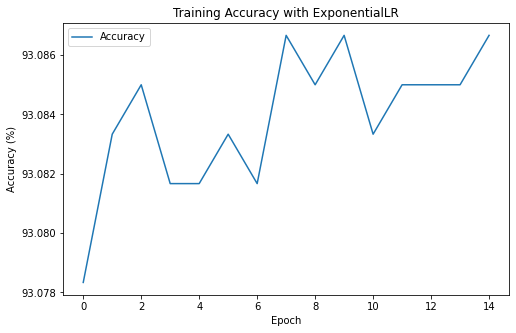

In [47]:
# Plot Accuracy over Epochs
plt.figure(figsize=(8, 5))
plt.plot(accuracies, label='Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training Accuracy with ExponentialLR')
plt.legend()
plt.show()

In [48]:
# ReduceLROnPlateau
num_epochs = 15
scheduler = scheduler_plateau
accuracies = []  

for epoch in range(num_epochs):
    running_loss = 0.0
    correct_predictions = 0
    total_predictions = 0
    
    for images, labels in train_dl:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct_predictions += (predicted == labels).sum().item()
        total_predictions += labels.size(0)
    
    avg_loss = running_loss / len(train_dl)
    accuracy = (correct_predictions / total_predictions) * 100
    accuracies.append(accuracy)  
   
    if isinstance(scheduler, optim.lr_scheduler.ReduceLROnPlateau):
        scheduler.step(avg_loss)  
    else:
        scheduler.step()
    
    print(f'-- Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}, LR: {scheduler.get_last_lr()[0]:.6f}, Accuracy: {accuracy:.2f}%')

-- Epoch [1/15], Loss: 0.2457, LR: 0.000002, Accuracy: 93.09%
-- Epoch [2/15], Loss: 0.2457, LR: 0.000002, Accuracy: 93.09%
-- Epoch [3/15], Loss: 0.2457, LR: 0.000002, Accuracy: 93.09%
-- Epoch [4/15], Loss: 0.2457, LR: 0.000000, Accuracy: 93.09%
-- Epoch [5/15], Loss: 0.2457, LR: 0.000000, Accuracy: 93.09%
-- Epoch [6/15], Loss: 0.2457, LR: 0.000000, Accuracy: 93.09%
-- Epoch [7/15], Loss: 0.2457, LR: 0.000000, Accuracy: 93.09%
-- Epoch [8/15], Loss: 0.2457, LR: 0.000000, Accuracy: 93.09%
-- Epoch [9/15], Loss: 0.2457, LR: 0.000000, Accuracy: 93.09%
-- Epoch [10/15], Loss: 0.2457, LR: 0.000000, Accuracy: 93.09%
-- Epoch [11/15], Loss: 0.2457, LR: 0.000000, Accuracy: 93.09%
-- Epoch [12/15], Loss: 0.2457, LR: 0.000000, Accuracy: 93.09%
-- Epoch [13/15], Loss: 0.2457, LR: 0.000000, Accuracy: 93.09%
-- Epoch [14/15], Loss: 0.2457, LR: 0.000000, Accuracy: 93.09%
-- Epoch [15/15], Loss: 0.2457, LR: 0.000000, Accuracy: 93.09%


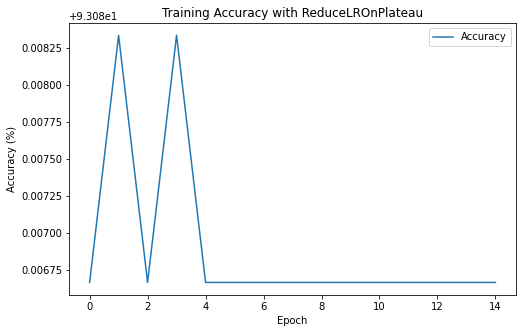

In [49]:
# Plot Accuracy over Epochs
plt.figure(figsize=(8, 5))
plt.plot(accuracies, label='Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training Accuracy with ReduceLROnPlateau')
plt.legend()
plt.show()

Three different optimization methods

In [21]:
# Define three different optimizers

# Define SGD, Adam and RMSprop optimizers 
optimizer_sgd = optim.SGD(model.parameters(), lr=0.01)
optimizer_adam = optim.Adam(model.parameters(), lr=0.001)
optimizer_rmsprop = optim.RMSprop(model.parameters(), lr=0.001)

In [22]:
# Train model 
def train_model(model, optimizer, criterion, num_epochs=5):
    accuracies = [] 
    
    for epoch in range(num_epochs):
        running_loss = 0.0
        correct_predictions = 0
        total_predictions = 0
        
        for images, labels in train_dl:
            optimizer.zero_grad()
            
            outputs = model(images)
            loss = criterion(outputs, labels)
            
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            
            _, predicted = torch.max(outputs, 1)
            correct_predictions += (predicted == labels).sum().item()
            total_predictions += labels.size(0)
        
        avg_loss = running_loss / len(train_dl)
        accuracy = (correct_predictions / total_predictions) * 100
        accuracies.append(accuracy)  # Append epoch accuracy to list
        
        print(f'-- Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}, Accuracy: {accuracy:.2f}%')
    
    return accuracies



In [66]:
# Train with SGD

sgd = MLP()
optimizer_sgd = optim.SGD(sgd.parameters(), lr=0.01)
accuracy_sgd = train_model(sgd, optimizer_sgd, criterion)


-- Epoch [1/5], Loss: 0.8732, Accuracy: 80.56%
-- Epoch [2/5], Loss: 0.3752, Accuracy: 89.68%
-- Epoch [3/5], Loss: 0.3200, Accuracy: 91.05%
-- Epoch [4/5], Loss: 0.2893, Accuracy: 91.84%
-- Epoch [5/5], Loss: 0.2658, Accuracy: 92.49%


In [67]:
# Train with Adam Optimizer
adam = MLP()
optimizer_adam = optim.Adam(adam.parameters(), lr=0.001)
accuracy_adam = train_model(adam, optimizer_adam, criterion)


-- Epoch [1/5], Loss: 0.2941, Accuracy: 91.88%
-- Epoch [2/5], Loss: 0.1279, Accuracy: 96.28%
-- Epoch [3/5], Loss: 0.0869, Accuracy: 97.39%
-- Epoch [4/5], Loss: 0.0658, Accuracy: 97.96%
-- Epoch [5/5], Loss: 0.0508, Accuracy: 98.36%


In [41]:
# Train with RMSprop
rmsprop = MLP()
optimizer_rmsprop = optim.RMSprop(rmsprop.parameters(), lr=0.001)
accuracy_rmsprop = train_model(rmsprop, optimizer_rmsprop, criterion)


Epoch [1/5], Loss: 0.2495, Accuracy: 92.86%
Epoch [2/5], Loss: 0.1177, Accuracy: 96.46%
Epoch [3/5], Loss: 0.0802, Accuracy: 97.57%
Epoch [4/5], Loss: 0.0611, Accuracy: 98.10%
Epoch [5/5], Loss: 0.0483, Accuracy: 98.48%


# CIFAR-10

Three different data augmentation techniques.

In [23]:
# color jitter 
transform_color_jitter = transforms.Compose([
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),  # Color jitter
    transforms.ToTensor()
])

In [24]:
# Horizontal flip
transform_random_flip = transforms.Compose([
    transforms.RandomHorizontalFlip(),     
    transforms.ToTensor()
])


# Dataset without transformations for the "before" images
transform_no_aug = transforms.Compose([
    transforms.ToTensor()
])




In [25]:
# crop with padding
transform_random_crop = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor()
])

In [26]:
# Load CIFAR-10 dataset with random cropping
cifar10_random_crop = datasets.CIFAR10(root='./data', train=True, transform=transform_random_crop, download=True)
cifar10_random_flip = datasets.CIFAR10(root='./data', train=True, transform=transform_random_flip, download=True)
cifar10_color_jitter = datasets.CIFAR10(root='./data', train=True, transform=transform_color_jitter, download=True)


Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [27]:
# Loaders to batch the datasets for visualization
batch_size = 8
loader_random_crop = DataLoader(cifar10_random_crop, batch_size=batch_size, shuffle=True)
loader_random_flip = DataLoader(cifar10_random_flip, batch_size=batch_size, shuffle=True)
loader_color_jitter = DataLoader(cifar10_color_jitter, batch_size=batch_size, shuffle=True)

In [28]:
# display images
def show_images(loader, title):
    data_iter = iter(loader)
    images, labels = next(data_iter)
    
    plt.figure(figsize=(8, 8))
    for i in range(batch_size):
        plt.subplot(2, 4, i+1)
        img = images[i].permute(1, 2, 0) 
        plt.imshow(img)
        plt.axis('off')
    plt.suptitle(title)
    plt.show()


In [29]:
def show_images(loader, title):
    data_iter = iter(loader)
    images, labels = next(data_iter)
    
    # Display images in a grid
    plt.figure(figsize=(8, 8))
    for i in range(len(images)):  # Use len(images) instead of batch_size
        plt.subplot(2, 4, i + 1)
        img = images[i].permute(1, 2, 0)  # Convert from CHW to HWC
        img = img * torch.tensor([0.247, 0.243, 0.261]) + torch.tensor([0.4914, 0.4822, 0.4465])  # Un-normalize if needed
        plt.imshow(img.numpy())
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

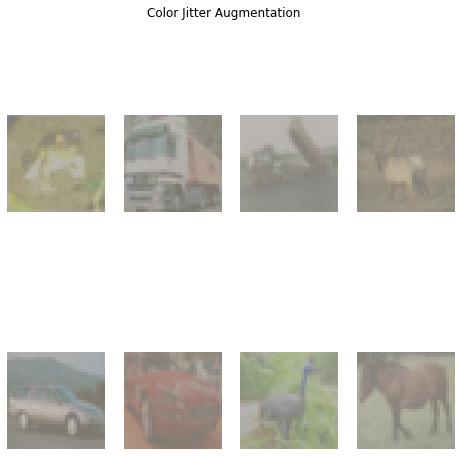

In [31]:
# Display images for color jitter

show_images(DataLoader(cifar10_color_jitter, batch_size=8), 'Color Jitter Augmentation')

Crop Augmentation:


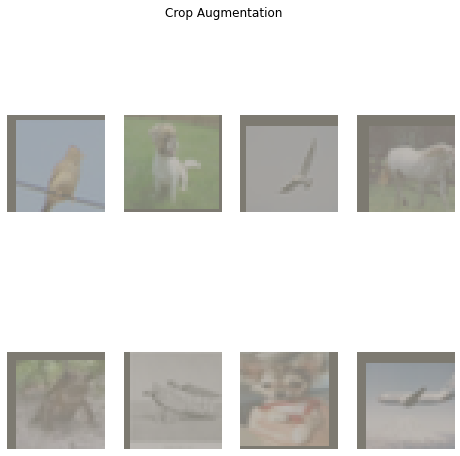

In [30]:
# Display images for crop Augmentation 

print("Crop Augmentation:")
show_images(loader_random_crop, 'Crop Augmentation')

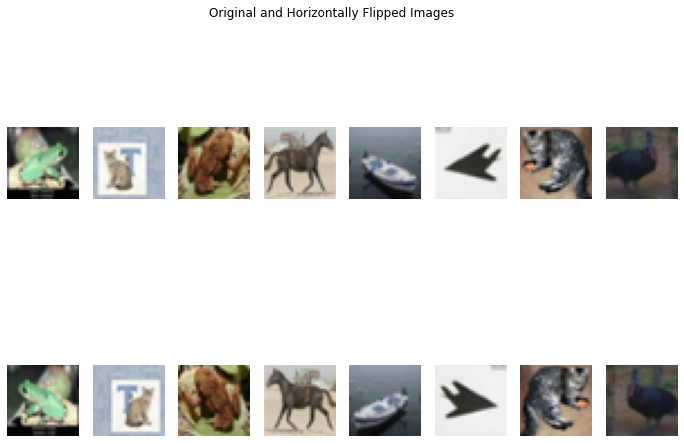

In [32]:
# display original and flipped images side-by-side instead 
def original_and_flipped(loader):
    data_iter = iter(loader)
    images, labels = next(data_iter)
    
    plt.figure(figsize=(12, 8))
    for i in range(batch_size):
        # Original image
        plt.subplot(2, batch_size, i+1)
        img = images[i].permute(1, 2, 0)  # Convert from CHW to HWC
        plt.imshow(img)
        plt.axis('off')
        
        # Flipped image using torchvision.transforms.functional
        flipped_img = F.hflip(images[i])  # Directly apply horizontal flip to tensor
        plt.subplot(2, batch_size, i+1+batch_size)
        flipped_img = flipped_img.permute(1, 2, 0)  # Convert from CHW to HWC
        plt.imshow(flipped_img)
        plt.axis('off')
    
    plt.suptitle('Original and Horizontally Flipped Images')
    plt.show()

# Display original and horizontally flipped images
original_and_flipped(loader_random_flip)

Three different learning rate schedulers

In [13]:
# CyclicLR
scheduler_cyclic = optim.lr_scheduler.CyclicLR(optimizer, base_lr=0.015, max_lr=0.02, step_size_up=5, mode='triangular')


In [14]:
# CosineAnnealingLR
scheduler_cosine = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=10)


In [15]:
# OneCycleLR
scheduler_one_cycle = optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.01, steps_per_epoch=len(train_loader), epochs=10)

In [78]:
# Train CyclicLR

num_epochs = 20
scheduler = scheduler_cyclic  

for epoch in range(num_epochs):
    running_loss = 0.0
    correct_predictions = 0
    total_predictions = 0
    
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model2(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1) 
        correct_predictions += (predicted == labels).sum().item()
        total_predictions += labels.size(0)
    
    avg_loss = running_loss / len(train_loader)
    accuracy = (correct_predictions / total_predictions) * 100
    #accuracies.append(accuracy) 
    
    scheduler.step()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}, Accuracy: {accuracy:.2f}%, LR: {scheduler.get_last_lr()[0]:.6f}')


Epoch [1/20], Loss: 2.3035, Accuracy: 9.88%, LR: 0.016000
Epoch [2/20], Loss: 2.3035, Accuracy: 9.88%, LR: 0.017000
Epoch [3/20], Loss: 2.3035, Accuracy: 9.88%, LR: 0.018000
Epoch [4/20], Loss: 2.3035, Accuracy: 9.88%, LR: 0.019000
Epoch [5/20], Loss: 2.3035, Accuracy: 9.88%, LR: 0.020000
Epoch [6/20], Loss: 2.3035, Accuracy: 9.88%, LR: 0.019000
Epoch [7/20], Loss: 2.3035, Accuracy: 9.88%, LR: 0.018000
Epoch [8/20], Loss: 2.3035, Accuracy: 9.88%, LR: 0.017000
Epoch [9/20], Loss: 2.3035, Accuracy: 9.88%, LR: 0.016000
Epoch [10/20], Loss: 2.3036, Accuracy: 9.88%, LR: 0.015000
Epoch [11/20], Loss: 2.3035, Accuracy: 9.88%, LR: 0.016000
Epoch [12/20], Loss: 2.3035, Accuracy: 9.88%, LR: 0.017000
Epoch [13/20], Loss: 2.3035, Accuracy: 9.88%, LR: 0.018000
Epoch [14/20], Loss: 2.3035, Accuracy: 9.88%, LR: 0.019000
Epoch [15/20], Loss: 2.3035, Accuracy: 9.88%, LR: 0.020000
Epoch [16/20], Loss: 2.3035, Accuracy: 9.88%, LR: 0.019000
Epoch [17/20], Loss: 2.3035, Accuracy: 9.88%, LR: 0.018000
Epoch 

In [72]:
# Train the Model with CosineAnnealingLR scheduler

scheduler = scheduler_cosine  

for epoch in range(num_epochs):
    running_loss = 0.0
    correct_predictions = 0
    total_predictions = 0
    
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model2(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1) 
        correct_predictions += (predicted == labels).sum().item()
        total_predictions += labels.size(0)
    
    avg_loss = running_loss / len(train_loader)
    accuracy = (correct_predictions / total_predictions) * 100
    #accuracies.append(accuracy)  
    
    scheduler.step()
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}, Accuracy: {accuracy:.2f}%, LR: {scheduler.get_last_lr()[0]:.6f}')


Epoch [1/5], Loss: 2.3035, Accuracy: 9.88%, LR: 0.009755
Epoch [2/5], Loss: 2.3035, Accuracy: 9.88%, LR: 0.009045
Epoch [3/5], Loss: 2.3035, Accuracy: 9.88%, LR: 0.007939
Epoch [4/5], Loss: 2.3035, Accuracy: 9.88%, LR: 0.006545
Epoch [5/5], Loss: 2.3035, Accuracy: 9.88%, LR: 0.005000


In [73]:
# Train the Model with OneCycleLR scheduler

scheduler = scheduler_one_cycle  

for epoch in range(num_epochs):
    running_loss = 0.0
    correct_predictions = 0
    total_predictions = 0
    
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model2(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)  
        correct_predictions += (predicted == labels).sum().item()
        total_predictions += labels.size(0)
    
    avg_loss = running_loss / len(train_loader)
    accuracy = (correct_predictions / total_predictions) * 100
    #accuracies.append(accuracy) 
    
    scheduler.step()
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}, Accuracy: {accuracy:.2f}%, LR: {scheduler.get_last_lr()[0]:.6f}')

Epoch [1/5], Loss: 2.3035, Accuracy: 9.88%, LR: 0.000400
Epoch [2/5], Loss: 2.3035, Accuracy: 9.88%, LR: 0.000400
Epoch [3/5], Loss: 2.3035, Accuracy: 9.88%, LR: 0.000400
Epoch [4/5], Loss: 2.3035, Accuracy: 9.88%, LR: 0.000400
Epoch [5/5], Loss: 2.3035, Accuracy: 9.88%, LR: 0.000400


Three different optimization methods

In [16]:
# Define Three Different Optimizers

# AdamW
adamw = optim.AdamW(model2.parameters(), lr=0.001, weight_decay=0.01)

# Adagrad
adagrad = optim.Adagrad(model2.parameters(), lr=0.01)

# Adamax
adamax = optim.Adamax(model2.parameters(), lr=0.002)



In [17]:
# Train the Model with Accuracy
def train_model(model2, optimizer, criterion, num_epochs=5):
    accuracies = []  
    
    for epoch in range(num_epochs):
        running_loss = 0.0
        correct_predictions = 0
        total_predictions = 0
        
        for images, labels in train_loader:
            optimizer.zero_grad()
            
            outputs = model2(images)
            loss = criterion(outputs, labels)
            
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            
            
            _, predicted = torch.max(outputs, 1)
            correct_predictions += (predicted == labels).sum().item()
            total_predictions += labels.size(0)
        
        accuracy = (correct_predictions / total_predictions) * 100
        accuracies.append(accuracy)
        
        avg_loss = running_loss / len(train_loader)
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}, Accuracy: {accuracy:.2f}%')
    


In [19]:
print("Training with AdamW Optimizer")
adamw = optim.AdamW(model2.parameters(), lr=0.001, weight_decay=0.01)
train_model(model2, adamw, criterion)


Training with AdamW Optimizer
Epoch [1/5], Loss: 1.5730, Accuracy: 41.59%
Epoch [2/5], Loss: 1.1618, Accuracy: 57.93%
Epoch [3/5], Loss: 0.9447, Accuracy: 66.43%
Epoch [4/5], Loss: 0.8012, Accuracy: 71.74%
Epoch [5/5], Loss: 0.6998, Accuracy: 75.55%


In [20]:
print("Training with Adamax Optimizer")
adamax = optim.Adagrad(model2.parameters(), lr=0.001, weight_decay=0.01)
train_model(model2, adamax, criterion)

Training with Adamax Optimizer
Epoch [1/5], Loss: 0.5342, Accuracy: 81.95%
Epoch [2/5], Loss: 0.5342, Accuracy: 82.13%
Epoch [3/5], Loss: 0.5438, Accuracy: 81.78%
Epoch [4/5], Loss: 0.5546, Accuracy: 81.53%
Epoch [5/5], Loss: 0.5629, Accuracy: 81.23%


In [42]:
print("Training with Adamax Optimizer")
adamax = optim.Adamax(model2.parameters(), lr=0.001, weight_decay=0.01)
train_model(model2, adamax, criterion)

Training with Adamax Optimizer
Epoch [1/5], Loss: 1.7403, Accuracy: 36.11%
Epoch [2/5], Loss: 1.6258, Accuracy: 40.29%
Epoch [3/5], Loss: 1.5758, Accuracy: 41.91%
Epoch [4/5], Loss: 1.5225, Accuracy: 44.46%
Epoch [5/5], Loss: 1.4637, Accuracy: 46.56%
